<a href="https://colab.research.google.com/github/centeno/covid-impact-scrapper/blob/master/02_pnl_2020_basic_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
# Install
# get domains
!pip3 install tld 

# geocoder ipaddress
!pip install msticpy

!pip install transformers
!pip install bert-extractive-summarizer
!pip install contextualSpellCheck
!pip install nltk
!pip install wordcloud
!python -m spacy download en_core_web_sm
!pip install vaderSentiment

     |████████████████████████████████| 409kB 4.1MB/s 
     |████████████████████████████████| 399kB 5.5MB/s 
     |████████████████████████████████| 204kB 17.5MB/s 
     |████████████████████████████████| 18.9MB 60.3MB/s 
     |████████████████████████████████| 92kB 9.6MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 512kB 35.3MB/s 
     |████████████████████████████████| 614kB 40.7MB/s 
     |████████████████████████████████| 788kB 37.7MB/s 
     |████████████████████████████████| 40kB 4.7MB/s 
     |████████████████████████████████| 204kB 54.2MB/s 
     |████████████████████████████████| 133kB 35.7MB/s 
     |████████████████████████████████| 112kB 43.3MB/s 
     |████████████████████████████████| 348kB 41.0MB/s 
     |████████████████████████████████| 3.2MB 48.7MB/s 
     |████████████████████████████████| 9.5MB 41.2MB/s 
     |████████████████████████████████| 40kB 4.2MB/s 
     |████████████████████████████████| 1.8MB 38.1MB/s 
 

     |████████████████████████████████| 1.9MB 5.7MB/s 
     |████████████████████████████████| 890kB 42.4MB/s 
     |████████████████████████████████| 3.2MB 35.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=449954409501bbd56cee6a87438f0ba3b47be5e978e1e4441513ee8d0b3bb727
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 133kB 4.1MB/s 
     |████████████████████████████████| 12.7MB 338kB/s 
     |████████████████████████████████| 1.1MB 41.6MB/s 
     |████████████████████████████████| 460kB 42.4MB/s 
     |████████████████████████████████| 9.1MB 45.9MB/s 
     |████████████████████████████████| 122kB 36.6MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=3d6d92f054ed03caef8726b88ac35c70efb612b40161d1b9662523d641ee440c
  Stored in directory: /root/.cache/pip/

# Imports

In [ ]:
# Manipulação e visualização de dados
import os
import re
import sys
import glob
import socket
import urllib
import datetime
import numpy as np
import pandas as pd
from time import sleep
import seaborn as sns
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
from collections import Counter
#from pylab import rcParams
#from tqdm import tqdm

# Com o NLTK fazemos Processamento de Linguagem Natural
import nltk
import spacy
import string

# Topic Modeling
import sklearn
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

# Translate
from textblob import TextBlob
from textblob.exceptions import NotTranslated

# Deep Learning, PLN e Métricas
import sklearn
import torch
import transformers 
from textwrap import wrap
from torch import nn, optim 
from torch.utils import data
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from transformers import BertModel
from transformers import BertTokenizer
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup

# Análise de Sentimentos
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Definimos o parâmetro abaixo para evitar o erro:
# RecursionError: maximum recursion depth exceeded
# Ao gravar os resultados em disco
sys.setrecursionlimit(10000)

%matplotlib inline

In [ ]:
# Temos que fazer o download do dicionário e demais pacotes do NLTK
# Vai abrir outra janela do navegador solicitando a seleção dos itens para download. 
# Selecione todos os itens com o mouse e então clique em Download. Feche a janela quando terminar.
#nltk.download()

In [ ]:
# Tokenização é o processo de quebrar uma sentença em palavras, por exemplo.
# Essa tarefa faz parte do processamento de linguagem natural. 
# Vamos importar a função word_tokenize.
from nltk import word_tokenize

In [ ]:
# As stopwords são palavras comuns, como artigos, advérbios ou conjunções.
# As stopwords devem ser removidas no processamento de linguagem natural.
# Vamos importar a função stopwords.
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Pacote para baixar modelos BERT e processar os dados
#!pip install -q transformers
#!pip install bert-extractive-summarizer

In [ ]:
# Versões dos pacotes usados neste jupyter notebook
#%reload_ext watermark
#%watermark -a "Geoint InsCer" --iversions

In [ ]:
# Codigo para montar o Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/covid19impact/data/2021_all/01_collect/en/")
!ls

01-2019-10-01.csv  01-2020-06-02.csv  02-2019-11-02.csv  02-2020-07-04.csv
01-2019-10-02.csv  01-2020-06-03.csv  02-2019-11-03.csv  02-2020-07-05.csv
01-2019-10-03.csv  01-2020-06-04.csv  02-2019-11-04.csv  02-2020-07-06.csv
01-2019-10-04.csv  01-2020-06-05.csv  02-2019-11-05.csv  02-2020-07-07.csv
01-2019-10-05.csv  01-2020-06-06.csv  02-2019-11-06.csv  02-2020-07-08.csv
01-2019-10-06.csv  01-2020-06-07.csv  02-2019-11-07.csv  02-2020-07-09.csv
01-2019-10-07.csv  01-2020-06-08.csv  02-2019-11-08.csv  02-2020-07-10.csv
01-2019-10-08.csv  01-2020-06-09.csv  02-2019-11-09.csv  02-2020-07-11.csv
01-2019-10-09.csv  01-2020-06-10.csv  02-2019-11-10.csv  02-2020-07-12.csv
01-2019-10-10.csv  01-2020-06-11.csv  02-2019-11-11.csv  02-2020-07-13.csv
01-2019-10-11.csv  01-2020-06-12.csv  02-2019-11-12.csv  02-2020-07-14.csv
01-2019-10-12.csv  01-2020-06-13.csv  02-2019-11-13.csv  02-2020-07-15.csv
01-2019-10-13.csv  01-2020-06-14.csv  02-2019-11-14.csv  02-2020-07-16.csv
01-2019-10-14.csv  01-202

# Input

## Merge csv

In [ ]:
path = "/content/drive/My Drive/covid19impact/data/2020/01_collect/en/"

In [ ]:
#os.chdir("/mydir")
os.chdir(path)

In [ ]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [ ]:
len(all_filenames)

458

In [ ]:
#combine all files in the list
df = pd.concat([pd.read_csv(f, sep=';', parse_dates=["date"], engine="python", encoding='UTF-8') for f in all_filenames ])

In [ ]:
#df = pd.read_csv(path + 'df_v1.csv', sep=';', encoding='UTF-8')

print(df.shape);
df.head()

(20068, 25)


,Unnamed: 0,date,header,summary,link,protocol,domain,path,query,fragment,host_name,ip_address,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,edges,Type,AdditionalData,IpAddress,header_context_true,summary_context_true
0,0,2020-10-31,Klaxon - Digital Marketplace,Approach to resilience: Klaxon is hosted on re...,https://www.digitalmarketplace.service.gov.uk/...,https,www.digitalmarketplace.service.gov.uk,/g-cloud/services/212871787612234,NaN,NaN,digitalmarketplace.service.gov.uk,54.239.174.10,US,United States,Illinois,Chicago,-87.671249,41.848850,16509.0,set(),geolocation,{},54.239.174.10,Klaxon - Digital Marketplace,Approach to resilience: Klaxon is hosted on re...
1,1,2020-10-31,Wolfwalkers Is Bringing Its Gorgeous Animation...,"Oct 31, 2020 — ... agile-manifesto · agile-min...",https://dradams.org/wolfwalkers-is-bringing-it...,https,dradams.org,/wolfwalkers-is-bringing-its-gorgeous-animatio...,NaN,NaN,dradams.org,108.167.161.60,US,United States,Massachusetts,Burlington,-71.204536,42.505989,46606.0,set(),geolocation,{},108.167.161.60,Wolfwalkers Is Bringing Its Gorgeous Animation...,"Oct 31, 2020 — ... agile-manifesto · agile-min..."
2,2,2020-10-31,Download Our Puerto Rico Relocation Guide - PR...,"Oct 31, 2020 — centers, software development, ...",https://relocatepuertorico.com/wp-content/uplo...,https,relocatepuertorico.com,/wp-content/uploads/2020/10/Prelocate-Relocati...,NaN,NaN,relocatepuertorico.com,192.169.188.188,US,United States,Arizona,Alhambra,-112.082550,33.509380,398101.0,set(),geolocation,{},192.169.188.188,Download Our Puerto Rico Relocation Guide - PR...,"Oct 31, 2020 — centers, software development, ..."
3,3,2020-10-31,Agenda 2020 - IRDG Leading Business Innovation...,"Nov 1, 2020 — ... to make work from home more ...",https://www.irdgannualconference.ie/agenda-2020/,https,www.irdgannualconference.ie,/agenda-2020/,NaN,NaN,irdgannualconference.ie,46.101.42.76,GB,United Kingdom,England,North Shields,-1.486000,55.026001,14061.0,set(),geolocation,{},46.101.42.76,Agenda 2020 - IRDG Leading Business Innovation...,"Nov 1, 2020 — ... to make work from home more ..."
4,4,2020-10-31,"The IoT in 2020 | Iot, Internet, Infographic -...",Software Development. IoT in retail a win for ...,https://br.pinterest.com/pin/756815912357983810/,https,br.pinterest.com,/pin/756815912357983810/,NaN,NaN,pinterest.com,23.35.72.244,US,United States,Illinois,Chicago,-87.671249,41.848850,16625.0,set(),geolocation,{},23.35.72.244,"The IoT in 2020 | Iot, Internet, Infographic -...",Software Development. IoT in retail a win for ...


In [ ]:
# Delete columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df = df.drop_duplicates(subset=['header', 'summary'], keep='first')

In [ ]:
#df = df.head(1000)

In [ ]:
print(df.shape);
df.head()

(11076, 24)


,date,header,summary,link,protocol,domain,path,query,fragment,host_name,ip_address,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,edges,Type,AdditionalData,IpAddress,header_context_true,summary_context_true
0,2020-10-31,Klaxon - Digital Marketplace,Approach to resilience: Klaxon is hosted on re...,https://www.digitalmarketplace.service.gov.uk/...,https,www.digitalmarketplace.service.gov.uk,/g-cloud/services/212871787612234,NaN,NaN,digitalmarketplace.service.gov.uk,54.239.174.10,US,United States,Illinois,Chicago,-87.671249,41.848850,16509.0,set(),geolocation,{},54.239.174.10,Klaxon - Digital Marketplace,Approach to resilience: Klaxon is hosted on re...
1,2020-10-31,Wolfwalkers Is Bringing Its Gorgeous Animation...,"Oct 31, 2020 — ... agile-manifesto · agile-min...",https://dradams.org/wolfwalkers-is-bringing-it...,https,dradams.org,/wolfwalkers-is-bringing-its-gorgeous-animatio...,NaN,NaN,dradams.org,108.167.161.60,US,United States,Massachusetts,Burlington,-71.204536,42.505989,46606.0,set(),geolocation,{},108.167.161.60,Wolfwalkers Is Bringing Its Gorgeous Animation...,"Oct 31, 2020 — ... agile-manifesto · agile-min..."
2,2020-10-31,Download Our Puerto Rico Relocation Guide - PR...,"Oct 31, 2020 — centers, software development, ...",https://relocatepuertorico.com/wp-content/uplo...,https,relocatepuertorico.com,/wp-content/uploads/2020/10/Prelocate-Relocati...,NaN,NaN,relocatepuertorico.com,192.169.188.188,US,United States,Arizona,Alhambra,-112.082550,33.509380,398101.0,set(),geolocation,{},192.169.188.188,Download Our Puerto Rico Relocation Guide - PR...,"Oct 31, 2020 — centers, software development, ..."
3,2020-10-31,Agenda 2020 - IRDG Leading Business Innovation...,"Nov 1, 2020 — ... to make work from home more ...",https://www.irdgannualconference.ie/agenda-2020/,https,www.irdgannualconference.ie,/agenda-2020/,NaN,NaN,irdgannualconference.ie,46.101.42.76,GB,United Kingdom,England,North Shields,-1.486000,55.026001,14061.0,set(),geolocation,{},46.101.42.76,Agenda 2020 - IRDG Leading Business Innovation...,"Nov 1, 2020 — ... to make work from home more ..."
4,2020-10-31,"The IoT in 2020 | Iot, Internet, Infographic -...",Software Development. IoT in retail a win for ...,https://br.pinterest.com/pin/756815912357983810/,https,br.pinterest.com,/pin/756815912357983810/,NaN,NaN,pinterest.com,23.35.72.244,US,United States,Illinois,Chicago,-87.671249,41.848850,16625.0,set(),geolocation,{},23.35.72.244,"The IoT in 2020 | Iot, Internet, Infographic -...",Software Development. IoT in retail a win for ...


# PNL - EDA

In [ ]:
# Order by date
df= df.sort_values(by=['date'])

In [ ]:
# Identify types of columns
df.dtypes

date                    datetime64[ns]
header                          object
summary                         object
link                            object
protocol                        object
domain                          object
path                            object
query                           object
fragment                       float64
host_name                       object
ip_address                      object
CountryCode                     object
CountryName                     object
State                           object
City                            object
Longitude                      float64
Latitude                       float64
Asn                            float64
edges                           object
Type                            object
AdditionalData                  object
IpAddress                       object
header_context_true             object
summary_context_true            object
dtype: object

## Get valid host name

In [ ]:

#Extracting multiple root domains from a CSV using print

from tld import get_tld, get_fld
 
urls = df['link']
#URLs should be in column A without a heading, in a CSV file named "urls_file.csv"

hostnames = []
for url in urls:
  try:
    res = get_tld(url, as_object=True)
    hostnames.append(res.fld)
  except:
  # Not yet known TLD or IP address or local hostname
    res = np.nan
    hostnames.append(res)
  #print(res.fld)
  

In [ ]:
df['host_name'] = hostnames

## Tarefa 1: Qual é a distribuição de frequência por fonte - Top10?

In [ ]:
# Vamos contar o total de registros por valor da coluna "Tipo_Pesquisa"
df["host_name"].value_counts()

computerweekly.com      337
sscbankgk.in            262
uktechnews.co.uk        211
publicnewsupdate.com    205
itbusinessnet.com       201
                       ... 
publicjobs.ie             1
agora.io                  1
simply-docs.co.uk         1
nsw.gov.au                1
ajiry.com                 1
Name: host_name, Length: 3431, dtype: int64

## Tarefa 1: Qual é a distribuição de frequência por fonte - Top30?

In [ ]:
# Agrupa o dataset por empresa
grupo1 = df.groupby("host_name").count()["header"].sort_values(ascending = False)

In [ ]:
# Visualiza os dados
grupo1.head(30)

host_name
computerweekly.com       337
sscbankgk.in             262
uktechnews.co.uk         211
publicnewsupdate.com     205
itbusinessnet.com        201
slacker.ro               189
smarthostingplans.com    174
ciol.com                 156
jobsearcher.com          154
itbrief.com.au           147
lensa.com                145
infoq.com                135
itbrief.co.nz            123
linkedin.com             113
indeed.com               106
issuu.com                 97
hirist.com                94
glassdoor.co.in           82
wilsonsmedia.com          81
yahoo.com                 79
imad.edu.es               76
glassdoor.com             72
medium.com                69
wellpaid.io               67
monsterindia.com          65
dailyremote.com           61
researchgate.net          59
remoteworkertech.asia     59
darkreading.com           56
forbes.com                53
Name: header, dtype: int64

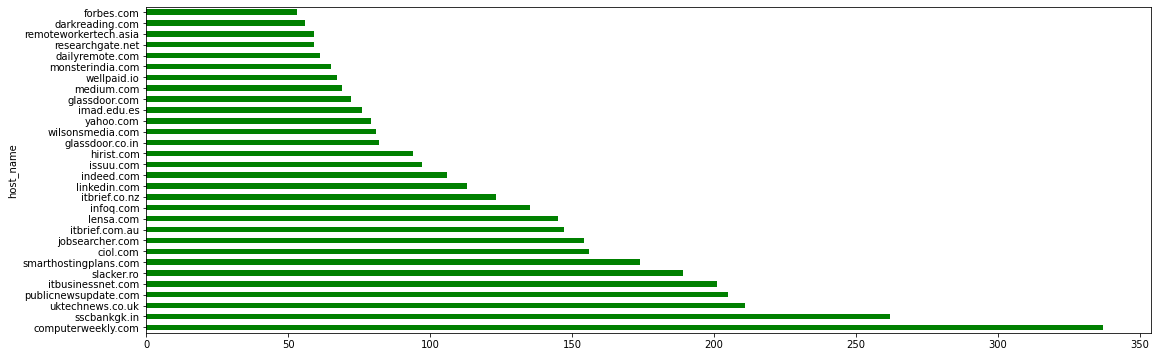

In [ ]:
# Gráfico top30 fontes

grupo1.head(30).plot(kind = "barh", figsize = (18,6), color = "green", rot = 0)

In [ ]:
# select rows containing 'bankinfosecurity'
df.loc[df['host_name'] == 'marketwatch.com'].head(3)

,date,header,summary,link,protocol,domain,path,query,fragment,host_name,ip_address,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,edges,Type,AdditionalData,IpAddress,header_context_true,summary_context_true


## Get features from dates

In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=False, errors='coerce')

In [ ]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['quarter'] = df.date.dt.quarter
df['day'] = df.date.dt.day
df['day_of_week'] = df.date.dt.dayofweek

## Tarefa 2: Qual é a distribuição de frequência por período

In [ ]:
sumary = df.groupby(['date']).agg(
    counts = pd.NamedAgg(column='date', aggfunc='count'),
        
).reset_index()

In [ ]:
sumary.head()

,date,counts
0,2019-10-01,16
1,2019-10-02,16
2,2019-10-03,10
3,2019-10-04,15
4,2019-10-05,4


In [ ]:
# convert the datetime column to a datetime type
sumary.date = pd.to_datetime(sumary.date)

In [ ]:
# set the column as the index
sumary.set_index('date', inplace=True)

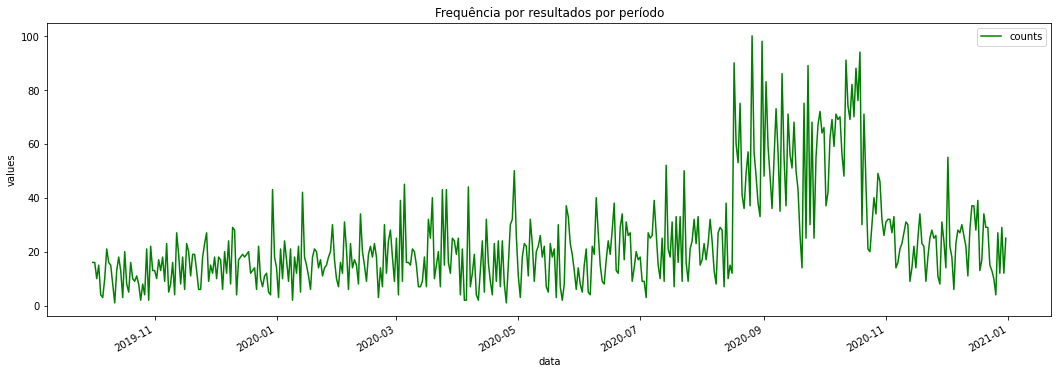

In [ ]:
# graph
ax = sumary.plot(color = 'g', figsize = (18,6))
plt.xlabel("data")
plt.ylabel('values')
plt.title("Frequência por resultados por período")
plt.show()

In [ ]:
sumary_host_name = df.groupby(['date','host_name']).agg(
    counts = pd.NamedAgg(column='host_name', aggfunc='count'),
        
).reset_index()

In [ ]:
sumary_host_name

,date,host_name,counts
0,2019-10-01,asetonline.org,1
1,2019-10-01,ciol.com,1
2,2019-10-01,cisco.com,1
3,2019-10-01,computerweekly.com,1
4,2019-10-01,e2etechnologies.co.uk,1
...,...,...,...
10460,2020-12-31,shrm.org,1
10461,2020-12-31,techbeacon.com,1
10462,2020-12-31,twitter.com,1
10463,2020-12-31,umd.edu,1



## Tarefa 2.1: Qual é a distribuição de frequência por trimestre

In [ ]:
quarter_sumary = df.groupby(['date']).agg(
    counts = pd.NamedAgg(column='date', aggfunc='count'),
        
).reset_index()

In [ ]:
quarter_sumary = quarter_sumary.set_index('date')
quarter_sumary.index = quarter_sumary.index.to_period("Q")

In [ ]:
quarter_sumary.head()

,counts
date,
2019Q4,16
2019Q4,16
2019Q4,10
2019Q4,15
2019Q4,4


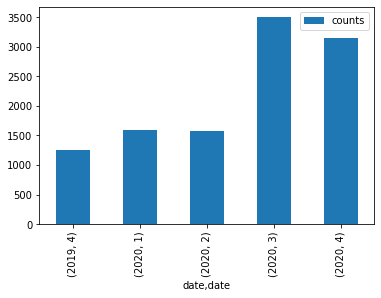

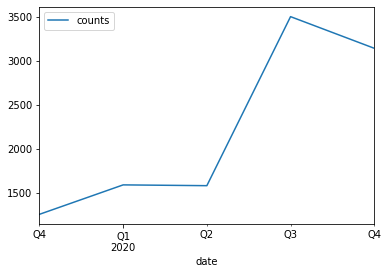

In [ ]:
quarter_sumary.groupby(by=[quarter_sumary.index.year, quarter_sumary.index.quarter]).sum().plot(kind='bar')
quarter_sumary.groupby(by=[quarter_sumary.index.year, quarter_sumary.index.quarter]).transform('sum').plot()

In [ ]:
path = '/content/drive/My Drive/covid19impact/data/2021_all/02_analytics/en/'

In [ ]:
df.to_csv(path+  'df_pnl_v1.csv', sep=';', encoding='UTF-8')

# PNL - basic modeling: insights




https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

####SpaCy
- https://www.analyticsvidhya.com/blog/2020/06/nlp-project-information-extraction/

####clusterização
- https://www.analyticsvidhya.com/blog/2020/08/how-to-use-texthero-to-prepare-a-text-based-dataset-for-your-nlp-project/


####automl
- https://gluon-nlp.mxnet.io/

## Basic Pre-processing

In [ ]:
# to string
df["header_context_true"] = df["header_context_true"].apply(str)
df['summary_context_true'] = df['summary_context_true'].apply(str)
df['link'] = df['link'].apply(str)

In [ ]:
# 2.1 Lower case
df["header_context_true"] = df["header_context_true"].apply(lambda x: " ".join(x.lower() for x in x.split()))
df["header_context_true"].tail()

2          college news and blog updates - bath college
3     https://www.sap.com/assetdetail/2015/06/bacebf...
4     yes, britain can spring back! andrew neil give...
20    cisco unified ip phone services application de...
6               happy holidays from our family to yours
Name: header_context_true, dtype: object

In [ ]:
df["summary_context_true"] = df["summary_context_true"].apply(lambda x: " ".join(x.lower() for x in x.split()))
df["summary_context_true"].tail()

2     jan 1, 2021 — case study: alice mcneil – softw...
3     networks and industry 4.0 can help you address...
4     jan 1, 2021 — as thousands of shopworkers face...
20    dec 31, 2020 — sdk overview. the cisco ip phon...
6     ensure information system resilience. implemen...
Name: summary_context_true, dtype: object

In [ ]:
df["link"] = df["link"].apply(lambda x: " ".join(x.lower() for x in x.split()))
df["link"].tail()

2      https://www.bathcollege.ac.uk/news-and-blog/blog
3                 https://www.sap.com/sitemap_video.xml
4     https://www.dailymail.co.uk/news/article-91050...
20    https://www.cisco.com/c/en/us/td/docs/voice_ip...
6               https://www.marvincpa.com/blog/view/new
Name: link, dtype: object

In [ ]:
# 2.2 Spelling correction
#!pip install contextualSpellCheck

In [ ]:
import spacy
#import contextualSpellCheck

#nlp = spacy.load('en')
#contextualSpellCheck.add_to_pipe(nlp)

In [ ]:
#df['text'].iloc[0]

In [ ]:
#doc = nlp(df['text'].iloc[0])

#print(doc._.performed_spellCheck) #Should be True
#print(doc._.outcome_spellCheck) #Income was $9.4 million compared to the prior year of $2.7 million.

In [ ]:
#df['text'].iloc[0]

In [ ]:
# Spelling correction
# Contextual spell correction using BERT (bidirectional representations)
# https://spacy.io/universe/project/contextualSpellCheck

#df['text_context_true'] = df['text'].apply(lambda x: str(nlp(x)))

In [ ]:
# Merge header and summary columns

#df["text"] =  df["header"] + " " + df["summary"]
df["text_context_true"] =  df["header_context_true"] + " " + df["summary_context_true"]  + " " + df["link"]
#df['text_context_true'] = df['text_context_true'].apply(lambda x: str(x))

In [ ]:
# 2.2 Removing Punctuation

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))


In [ ]:
df["text_wo_punct"] = df["text_context_true"].apply(lambda text: remove_punctuation(text))
df.tail()

,date,header,summary,link,protocol,domain,path,query,fragment,host_name,ip_address,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,edges,Type,AdditionalData,IpAddress,header_context_true,summary_context_true,year,month,quarter,day,day_of_week,text_context_true,text_wo_punct
2,2020-12-31,College News and Blog Updates - Bath College,"Jan 1, 2021 — Case Study: Alice McNeil – Softw...",https://www.bathcollege.ac.uk/news-and-blog/blog,https,www.bathcollege.ac.uk,/news-and-blog/blog,NaN,NaN,bathcollege.ac.uk,31.210.130.88,GB,United Kingdom,England,Hounslow,-0.359170,51.453060,39537.0,set(),geolocation,{},31.210.130.88,college news and blog updates - bath college,"jan 1, 2021 — case study: alice mcneil – softw...",2020,12,4,31,3,college news and blog updates - bath college j...,college news and blog updates bath college ja...
3,2020-12-31,https://www.sap.com/assetdetail/2015/06/bacebf...,Networks and Industry 4.0 can help you address...,https://www.sap.com/sitemap_video.xml,https,www.sap.com,/sitemap_video.xml,NaN,NaN,sap.com,23.7.109.167,US,United States,Illinois,Prospect Heights,-87.925552,42.062691,16625.0,set(),geolocation,{},23.7.109.167,https://www.sap.com/assetdetail/2015/06/bacebf...,networks and industry 4.0 can help you address...,2020,12,4,31,3,https://www.sap.com/assetdetail/2015/06/bacebf...,httpswwwsapcomassetdetail201506bacebf0d877c001...
4,2020-12-31,"Yes, Britain CAN spring back! ANDREW NEIL give...","Jan 1, 2021 — As thousands of shopworkers face...",https://www.dailymail.co.uk/news/article-91050...,https,www.dailymail.co.uk,/news/article-9105037/Yes-Britain-spring-ANDRE...,NaN,NaN,dailymail.co.uk,23.48.106.183,US,United States,Illinois,Prospect Heights,-87.925552,42.062691,16625.0,set(),geolocation,{},23.48.106.183,"yes, britain can spring back! andrew neil give...","jan 1, 2021 — as thousands of shopworkers face...",2020,12,4,31,3,"yes, britain can spring back! andrew neil give...",yes britain can spring back andrew neil gives ...
20,2020-12-31,Cisco Unified IP Phone Services Application De...,"Dec 31, 2020 — SDK Overview. The Cisco IP Phon...",https://www.cisco.com/c/en/us/td/docs/voice_ip...,https,www.cisco.com,/c/en/us/td/docs/voice_ip_comm/cuipph/all_mode...,NaN,NaN,cisco.com,23.6.134.41,US,United States,Illinois,Prospect Heights,-87.925552,42.062691,16625.0,set(),geolocation,{},23.6.134.41,cisco unified ip phone services application de...,"dec 31, 2020 — sdk overview. the cisco ip phon...",2020,12,4,31,3,cisco unified ip phone services application de...,cisco unified ip phone services application de...
6,2020-12-31,Happy Holidays from Our Family to Yours,Ensure information system resilience. Implemen...,https://www.marvincpa.com/blog/view/new,https,www.marvincpa.com,/blog/view/new,NaN,NaN,marvincpa.com,68.66.216.9,US,United States,Michigan,Ann Arbor,-83.745499,42.283600,55293.0,set(),geolocation,{},68.66.216.9,happy holidays from our family to yours,ensure information system resilience. implemen...,2020,12,4,31,3,happy holidays from our family to yours ensure...,happy holidays from our family to yours ensure...


In [ ]:
df.iloc[0]

date                                                  2019-10-01 00:00:00
header                  It Computers Hardware Networking Jobs in Kuala...
summary                 Python Engineer<br> <br> Responsibilities:<br>...
link                    https://www.monster.com.my/search/it-computers...
protocol                                                            https
domain                                                 www.monster.com.my
path                    /search/it-computers-hardware-networking-jobs-...
query                                                                 NaN
fragment                                                              NaN
host_name                                                  monster.com.my
ip_address                                                  23.59.127.247
CountryCode                                                            US
CountryName                                                 United States
State                                 

## Tokenização

In [ ]:
df.dtypes

date                    datetime64[ns]
header                          object
summary                         object
link                            object
protocol                        object
domain                          object
path                            object
query                           object
fragment                       float64
host_name                       object
ip_address                      object
CountryCode                     object
CountryName                     object
State                           object
City                            object
Longitude                      float64
Latitude                       float64
Asn                            float64
edges                           object
Type                            object
AdditionalData                  object
IpAddress                       object
header_context_true             object
summary_context_true            object
year                             int64
month                    

In [ ]:
# Checking the first 10 most frequent words
from collections import Counter
cnt = Counter()
for text in df["text_wo_punct"].values:
    try:
    # if player_stats['guardians'] is currently a string, let's split on the phrase " and 
        for word in text.split():
            cnt[word] += 1
    except:
    # otherwise, it is already split so we can just ignore the error.
        pass
          
cnt.most_common(20)

[('and', 11410),
 ('the', 10373),
 ('software', 9676),
 ('to', 9211),
 ('—', 7534),
 ('2020', 7291),
 ('work', 7285),
 ('development', 7115),
 ('of', 6855),
 ('from', 6710),
 ('in', 6179),
 ('a', 5594),
 ('home', 5335),
 ('remote', 5311),
 ('disaster', 5146),
 ('·', 4917),
 ('for', 4545),
 ('working', 4113),
 ('resilience', 3833),
 ('is', 2678)]

In [ ]:
# Obtém as stopwords em todos os idiomas
dicionario_stopwords = {lang: set(nltk.corpus.stopwords.words(lang)) for lang in nltk.corpus.stopwords.fileids()}
#dicionario_stopwords

In [ ]:
# Função para detectar o idioma predominante com base nas stopwords
def descobre_idioma(text):
    
    # Aplica tokenização considerando pontuação
    palavras = set(nltk.wordpunct_tokenize(text.lower()))
    
    # Conta o total de palavras tokenizadas considerando o dicionário de stopwords
    lang = max(((lang, len(palavras & stopwords)) for lang, stopwords in dicionario_stopwords.items()), key = lambda x: x[1])[0]
    
    # Verifica se o idioma é português
    if lang == 'portuguese':
        return True
    else:
        return False

In [ ]:
# 2.3 Removal of Stop Words

import nltk
nltk.download('stopwords')

stop = stopwords.words('english')

df["text_clean"] = df["text_wo_punct"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df["text_clean"].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


9    computers hardware networking jobs kuala lumpu...
1    bcmsd communication semantics scribd oct 1 201...
2    allergy – infection control society pakistan o...
4    hci growing fast india abroad ciol oct 1 2019 ...
6    aset annual conference 2019 oct 1 2019 — progr...
Name: text_clean, dtype: object

In [ ]:
# Função de limpeza dos dados
def limpa_dados(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    desc = [word for word in desc if word not in stop_words_pt]
    desc = [word for word in desc if word not in stop_words_en]
    return desc

In [ ]:
# Vamos definir a lista de stopwords em português
stop_words_pt = stopwords.words('portuguese')

In [ ]:
# Vamos definir a lista de stopwords em inglês
stop_words_en = stopwords.words('english')

In [ ]:
# Aplicamos a função de limpeza a coluna de descrição da vaga
df["text_clean"] = df["text_wo_punct"].apply(limpa_dados)

In [ ]:
df["text_clean"]

9     [computers, hardware, networking, jobs, kuala,...
1     [bcmsd, communication, semantics, scribd, oct,...
2     [allergy, infection, control, society, pakista...
4     [hci, growing, fast, india, abroad, ciol, oct,...
6     [aset, annual, conference, oct, programmers, s...
                            ...                        
2     [college, news, blog, updates, bath, college, ...
3     [networks, industry, help, address, supply, ch...
4     [yes, britain, spring, back, andrew, neil, giv...
20    [cisco, unified, phone, services, application,...
6     [happy, holidays, family, ensure, information,...
Name: text_clean, Length: 11076, dtype: object

In [ ]:
# Removal of Frequent words

FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])

def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

In [ ]:
df["text_wo_stopfreq"] = df["text_clean"].apply(lambda text: remove_freqwords(text))
df.head()

,date,header,summary,link,protocol,domain,path,query,fragment,host_name,ip_address,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,edges,Type,AdditionalData,IpAddress,header_context_true,summary_context_true,year,month,quarter,day,day_of_week,text_context_true,text_wo_punct,text_clean,text_wo_stopfreq
9,2019-10-01,It Computers Hardware Networking Jobs in Kuala...,Python Engineer<br> <br> Responsibilities:<br>...,https://www.monster.com.my/search/it-computers...,https,www.monster.com.my,/search/it-computers-hardware-networking-jobs-...,NaN,NaN,monster.com.my,23.59.127.247,US,United States,Georgia,Atlanta,-84.388283,33.798458,16625.0,set(),geolocation,{},23.59.127.247,it computers hardware networking jobs in kuala...,python engineer<br> <br> responsibilities:<br>...,2019,10,4,1,1,it computers hardware networking jobs in kuala...,it computers hardware networking jobs in kuala...,"[computers, hardware, networking, jobs, kuala,...","['computers', 'hardware', 'networking', 'jobs'..."
1,2019-10-01,bcmsd | Communication | Semantics - Scribd,"Oct 1, 2019 — ... can be broadly divided into ...",https://www.scribd.com/document/428306594/bcmsd,https,www.scribd.com,/document/428306594/bcmsd,NaN,NaN,scribd.com,151.101.2.152,US,United States,California,San Francisco,-122.392860,37.767849,54113.0,set(),geolocation,{},151.101.2.152,bcmsd | communication | semantics - scribd,"oct 1, 2019 — ... can be broadly divided into ...",2019,10,4,1,1,bcmsd | communication | semantics - scribd oct...,bcmsd communication semantics scribd oct 1 ...,"[bcmsd, communication, semantics, scribd, oct,...","['bcmsd', 'communication', 'semantics', 'scrib..."
2,2019-10-01,Allergy – Infection Control Society Pakistan,"Oct 1, 2019 — Great on paper-unfortunately a d...",https://infectioncontrolsociety.com/4190-2/,https,infectioncontrolsociety.com,/4190-2/,NaN,NaN,infectioncontrolsociety.com,192.254.187.12,US,United States,Massachusetts,Burlington,-71.204536,42.505989,46606.0,set(),geolocation,{},192.254.187.12,allergy – infection control society pakistan,"oct 1, 2019 — great on paper-unfortunately a d...",2019,10,4,1,1,allergy – infection control society pakistan o...,allergy – infection control society pakistan o...,"[allergy, infection, control, society, pakista...","['allergy', 'infection', 'control', 'society',..."
4,2019-10-01,Why HCI is growing fast both in India and abro...,"Oct 1, 2019 — People moved from monolithic arc...",https://www.ciol.com/hci-growing-fast-india-ab...,https,www.ciol.com,/hci-growing-fast-india-abroad/,NaN,NaN,ciol.com,192.124.249.158,US,United States,California,Menifee,-117.189110,33.657532,30148.0,set(),geolocation,{},192.124.249.158,why hci is growing fast both in india and abro...,"oct 1, 2019 — people moved from monolithic arc...",2019,10,4,1,1,why hci is growing fast both in india and abro...,why hci is growing fast both in india and abro...,"[hci, growing, fast, india, abroad, ciol, oct,...","['hci', 'growing', 'fast', 'india', 'abroad', ..."
6,2019-10-01,ASET Annual Conference 2019,"Oct 1, 2019 — Programmers and software develop...",https://www.asetonline.org/wp-content/uploads/...,https,www.asetonline.org,/wp-content/uploads/2019/10/2019-Proceedings.pdf,NaN,NaN,asetonline.org,104.21.3.73,SG,Singapore,South West,Singapore,103.819801,1.320000,13335.0,set(),geolocation,{},104.21.3.73,aset annual conference 2019,"oct 1, 2019 — programmers and software develop...",2019,10,4,1,1,"aset annual conference 2019 oct 1, 2019 — prog...",aset annual conference 2019 oct 1 2019 — progr...,"[aset, annual, conference, oct, programmers, s...","['aset', 'annual', 'conference', 'oct', 'progr..."


In [ ]:
# Removal of Rare words

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

In [ ]:
df["text_wo_stopfreqrare"] = df["text_wo_stopfreq"].apply(lambda text: remove_rarewords(text))
df.head()

,date,header,summary,link,protocol,domain,path,query,fragment,host_name,ip_address,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,edges,Type,AdditionalData,IpAddress,header_context_true,summary_context_true,year,month,quarter,day,day_of_week,text_context_true,text_wo_punct,text_clean,text_wo_stopfreq,text_wo_stopfreqrare
9,2019-10-01,It Computers Hardware Networking Jobs in Kuala...,Python Engineer<br> <br> Responsibilities:<br>...,https://www.monster.com.my/search/it-computers...,https,www.monster.com.my,/search/it-computers-hardware-networking-jobs-...,NaN,NaN,monster.com.my,23.59.127.247,US,United States,Georgia,Atlanta,-84.388283,33.798458,16625.0,set(),geolocation,{},23.59.127.247,it computers hardware networking jobs in kuala...,python engineer<br> <br> responsibilities:<br>...,2019,10,4,1,1,it computers hardware networking jobs in kuala...,it computers hardware networking jobs in kuala...,"[computers, hardware, networking, jobs, kuala,...","['computers', 'hardware', 'networking', 'jobs'...","['computers', 'hardware', 'networking', 'jobs'..."
1,2019-10-01,bcmsd | Communication | Semantics - Scribd,"Oct 1, 2019 — ... can be broadly divided into ...",https://www.scribd.com/document/428306594/bcmsd,https,www.scribd.com,/document/428306594/bcmsd,NaN,NaN,scribd.com,151.101.2.152,US,United States,California,San Francisco,-122.392860,37.767849,54113.0,set(),geolocation,{},151.101.2.152,bcmsd | communication | semantics - scribd,"oct 1, 2019 — ... can be broadly divided into ...",2019,10,4,1,1,bcmsd | communication | semantics - scribd oct...,bcmsd communication semantics scribd oct 1 ...,"[bcmsd, communication, semantics, scribd, oct,...","['bcmsd', 'communication', 'semantics', 'scrib...","['bcmsd', 'communication', 'semantics', 'scrib..."
2,2019-10-01,Allergy – Infection Control Society Pakistan,"Oct 1, 2019 — Great on paper-unfortunately a d...",https://infectioncontrolsociety.com/4190-2/,https,infectioncontrolsociety.com,/4190-2/,NaN,NaN,infectioncontrolsociety.com,192.254.187.12,US,United States,Massachusetts,Burlington,-71.204536,42.505989,46606.0,set(),geolocation,{},192.254.187.12,allergy – infection control society pakistan,"oct 1, 2019 — great on paper-unfortunately a d...",2019,10,4,1,1,allergy – infection control society pakistan o...,allergy – infection control society pakistan o...,"[allergy, infection, control, society, pakista...","['allergy', 'infection', 'control', 'society',...","['allergy', 'infection', 'control', 'society',..."
4,2019-10-01,Why HCI is growing fast both in India and abro...,"Oct 1, 2019 — People moved from monolithic arc...",https://www.ciol.com/hci-growing-fast-india-ab...,https,www.ciol.com,/hci-growing-fast-india-abroad/,NaN,NaN,ciol.com,192.124.249.158,US,United States,California,Menifee,-117.189110,33.657532,30148.0,set(),geolocation,{},192.124.249.158,why hci is growing fast both in india and abro...,"oct 1, 2019 — people moved from monolithic arc...",2019,10,4,1,1,why hci is growing fast both in india and abro...,why hci is growing fast both in india and abro...,"[hci, growing, fast, india, abroad, ciol, oct,...","['hci', 'growing', 'fast', 'india', 'abroad', ...","['hci', 'growing', 'fast', 'india', 'abroad', ..."
6,2019-10-01,ASET Annual Conference 2019,"Oct 1, 2019 — Programmers and software develop...",https://www.asetonline.org/wp-content/uploads/...,https,www.asetonline.org,/wp-content/uploads/2019/10/2019-Proceedings.pdf,NaN,NaN,asetonline.org,104.21.3.73,SG,Singapore,South West,Singapore,103.819801,1.320000,13335.0,set(),geolocation,{},104.21.3.73,aset annual conference 2019,"oct 1, 2019 — programmers and software develop...",2019,10,4,1,1,"aset annual conference 2019 oct 1, 2019 — prog...",aset annual conference 2019 oct 1 2019 — progr...,"[aset, annual, conference, oct, programmers, s...","['aset', 'annual', 'conference', 'oct', 'progr...","['aset', 'annual', 'conference', 'oct', 'progr..."


In [ ]:
# Lemmatization

# https://towardsdatascience.com/text-preprocessing-for-data-scientist-3d2419c8199d
# https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV} # Pos tag, used Noun, Verb, Adjective and Adverb

# Function for lemmatization using POS tag
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])
# Passing the function to 'text_rare' and store in 'text_lemma'
df["text_lemma"] = df["text_wo_stopfreqrare"].apply(lemmatize_words)


In [ ]:
df.tail(3)

,date,header,summary,link,protocol,domain,path,query,fragment,host_name,ip_address,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,edges,Type,AdditionalData,IpAddress,header_context_true,summary_context_true,year,month,quarter,day,day_of_week,text_context_true,text_wo_punct,text_clean,text_wo_stopfreq,text_wo_stopfreqrare,text_lemma
4,2020-12-31,"Yes, Britain CAN spring back! ANDREW NEIL give...","Jan 1, 2021 — As thousands of shopworkers face...",https://www.dailymail.co.uk/news/article-91050...,https,www.dailymail.co.uk,/news/article-9105037/Yes-Britain-spring-ANDRE...,NaN,NaN,dailymail.co.uk,23.48.106.183,US,United States,Illinois,Prospect Heights,-87.925552,42.062691,16625.0,set(),geolocation,{},23.48.106.183,"yes, britain can spring back! andrew neil give...","jan 1, 2021 — as thousands of shopworkers face...",2020,12,4,31,3,"yes, britain can spring back! andrew neil give...",yes britain can spring back andrew neil gives ...,"[yes, britain, spring, back, andrew, neil, giv...","['yes', 'britain', 'spring', 'back', 'andrew',...","['yes', 'britain', 'spring', 'back', 'andrew',...","['yes', 'britain', 'spring', 'back', 'andrew',..."
20,2020-12-31,Cisco Unified IP Phone Services Application De...,"Dec 31, 2020 — SDK Overview. The Cisco IP Phon...",https://www.cisco.com/c/en/us/td/docs/voice_ip...,https,www.cisco.com,/c/en/us/td/docs/voice_ip_comm/cuipph/all_mode...,NaN,NaN,cisco.com,23.6.134.41,US,United States,Illinois,Prospect Heights,-87.925552,42.062691,16625.0,set(),geolocation,{},23.6.134.41,cisco unified ip phone services application de...,"dec 31, 2020 — sdk overview. the cisco ip phon...",2020,12,4,31,3,cisco unified ip phone services application de...,cisco unified ip phone services application de...,"[cisco, unified, phone, services, application,...","['cisco', 'unified', 'phone', 'services', 'app...","['cisco', 'unified', 'phone', 'services', 'app...","['cisco', 'unified', 'phone', 'services', 'app..."
6,2020-12-31,Happy Holidays from Our Family to Yours,Ensure information system resilience. Implemen...,https://www.marvincpa.com/blog/view/new,https,www.marvincpa.com,/blog/view/new,NaN,NaN,marvincpa.com,68.66.216.9,US,United States,Michigan,Ann Arbor,-83.745499,42.283600,55293.0,set(),geolocation,{},68.66.216.9,happy holidays from our family to yours,ensure information system resilience. implemen...,2020,12,4,31,3,happy holidays from our family to yours ensure...,happy holidays from our family to yours ensure...,"[happy, holidays, family, ensure, information,...","['happy', 'holidays', 'family', 'ensure', 'inf...","['happy', 'holidays', 'family', 'ensure', 'inf...","['happy', 'holidays', 'family', 'ensure', 'inf..."


### Basic Feature Extraction

In [ ]:
# Vamos sumarizar os textos
desc_itens = df["text_clean"].apply(Counter).sum().items()

In [ ]:
# Ordenamos o resultado
desc_itens = sorted(desc_itens, key = lambda kv: kv[1], reverse = True)

In [ ]:
# Criamos uma série
desc_itens_serie = pd.Series({k: v for k, v in desc_itens})

In [ ]:
# Visualizamos os dados, com a contagem de palavras mais frequentes nas descrições dos registros
desc_itens_serie.head(20)

software       9680
work           7328
development    7122
home           5383
remote         5318
disaster       5173
working        4122
resilience     3854
recovery       2499
security       1845
business       1736
jobs           1312
new            1286
data           1280
digital        1154
engineers      1134
cloud          1119
engineer       1090
agile          1039
management     1018
dtype: int64

In [ ]:
keyword = 'intext:"covid-19" OR "covid" OR "coronavirus" OR "covid-19 impact" OR "covid impact" OR "coronavirus impact" OR "disaster" OR "resilience" AND intext: "software" OR "software engineering" OR "software engineers" OR "software development" OR "engineering" OR "information technology industry" OR "information technology IT industry" OR "IT industry" OR "disaster informatics" OR "crisis informatics" AND intitle: "covid-19" OR "covid" OR "coronavirus" OR "covid-19 impact" OR "covid impact" OR "coronavirus impact" OR "productivity" OR "work from home" OR "remote working" OR "future of work"'
keyword = keyword.replace(' OR ', ',')
keyword = keyword.replace(' AND ', ',')
keyword = keyword.replace("'", '')

keyword = keyword.replace('intext:', '')
keyword = keyword.replace('intitle:', '')
keyword

'"covid-19","covid","coronavirus","covid-19 impact","covid impact","coronavirus impact","disaster","resilience", "software","software engineering","software engineers","software development","engineering","information technology industry","information technology IT industry","IT industry","disaster informatics","crisis informatics", "covid-19","covid","coronavirus","covid-19 impact","covid impact","coronavirus impact","productivity","work from home","remote working","future of work"'

In [ ]:
# Vamos criar uma lista de strings (as strings de busca) para pesquisar como elas aparecem (estão distribuida) nos textos
# Usamos as palavras em minúsculo pois ao limpar os dados convertemos tudo para minúsculo

strings = [
"coronavirus",
"covid-19",
"covid",
"coronavirus impact",
"covid-19 impact",
"covid impact",
"disaster",
"resilience", 
"software",
"software engineers",
"software engineering",
"software development",
"engineering",
"it industry",
"information technology industry",
"information technology it industry",
"crisis informatics",
"disaster informatics",
"productivity",
"work from home",
"remote working",
"future of work"
]



In [ ]:
# Filtramos a série com as strings
filtro_strings = desc_itens_serie.filter(items = strings)

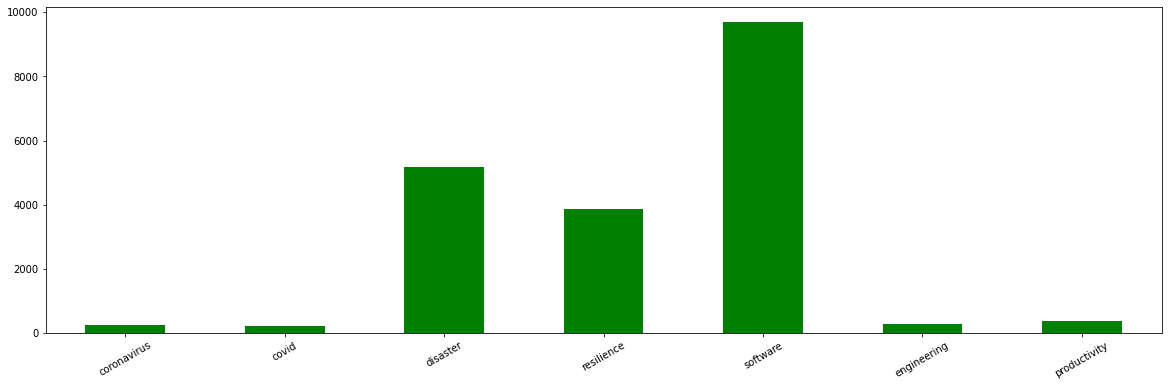

In [ ]:
# Criamos o plot
filtro_strings.plot(kind = 'bar', figsize = (20,6), color = "green", rot = 30)

In [ ]:
# 1.1 Number of Words

df['word_count'] = df["text_lemma"].apply(lambda x: len(str(x).split(" ")))
df[['text_lemma','word_count']].head()

,text_lemma,word_count
9,"['computers', 'hardware', 'networking', 'jobs'...",19
1,"['bcmsd', 'communication', 'semantics', 'scrib...",19
2,"['allergy', 'infection', 'control', 'society',...",21
4,"['hci', 'growing', 'fast', 'india', 'abroad', ...",19
6,"['aset', 'annual', 'conference', 'oct', 'progr...",16


In [ ]:
# 1.2 Number of characters

df['char_count'] = df["text_lemma"].map(lambda i: len(i))
df[['text_lemma','char_count']].head()

,text_lemma,char_count
9,"['computers', 'hardware', 'networking', 'jobs'...",292
1,"['bcmsd', 'communication', 'semantics', 'scrib...",207
2,"['allergy', 'infection', 'control', 'society',...",225
4,"['hci', 'growing', 'fast', 'india', 'abroad', ...",232
6,"['aset', 'annual', 'conference', 'oct', 'progr...",186


In [ ]:
# 1.3 Average Word Length

def avg_word(sentence):
    words = [sentence.split() for sentence in sentence]
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df["text_lemma"].apply(lambda x: avg_word(x))
df[['text_lemma','avg_word']].head()

,text_lemma,avg_word
9,"['computers', 'hardware', 'networking', 'jobs'...",0.938356
1,"['bcmsd', 'communication', 'semantics', 'scrib...",0.913043
2,"['allergy', 'infection', 'control', 'society',...",0.911111
4,"['hci', 'growing', 'fast', 'india', 'abroad', ...",0.922414
6,"['aset', 'annual', 'conference', 'oct', 'progr...",0.919355


In [ ]:
# 1.4 Number of stopwords

from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['text_wo_punct'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['text_wo_punct','stopwords']].head()

,text_wo_punct,stopwords
9,it computers hardware networking jobs in kuala...,9
1,bcmsd communication semantics scribd oct 1 ...,6
2,allergy – infection control society pakistan o...,4
4,why hci is growing fast both in india and abro...,15
6,aset annual conference 2019 oct 1 2019 — progr...,6


In [ ]:
# 1.5 Number of special characters

df['hastags'] = df['text_wo_punct'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['text_wo_punct','hastags']].head()

,text_wo_punct,hastags
9,it computers hardware networking jobs in kuala...,0
1,bcmsd communication semantics scribd oct 1 ...,0
2,allergy – infection control society pakistan o...,0
4,why hci is growing fast both in india and abro...,0
6,aset annual conference 2019 oct 1 2019 — progr...,0


In [ ]:
path

'/content/drive/My Drive/covid19impact/data/2021_all/02_analytics/en/'

In [ ]:
df.to_csv(path+  'df_pnl_v1.csv', sep=';', encoding='UTF-8')

# PNL - medium modeling: topics

- http://localhost:8888/notebooks/dsa/webscraping/Lab10/Lab10.ipynb
- https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

Modelagem de Tópicos é uma forma de mineração de texto, uma forma de identificar padrões. Construindo um corpus e executando uma ferramenta que gera grupos de palavras a respeito do corpus distribuídas em “tópicos”. 

Modelagem de tópicos é um método para achar e traçar clusters de palavras (chamado “tópicos” de forma abreviada) em grandes conjuntos de texto.

Aqui tem uma definição completa sobre o tema:

http://journalofdigitalhumanities.org/2-1/topic-modeling-a-basic-introduction-by-megan-r-brett/#topic-modeling-a-basic-introduction-by-megan-r-brett-n-1

In [ ]:
df.head(2)

,date,header,summary,link,protocol,domain,path,query,fragment,host_name,ip_address,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,edges,Type,AdditionalData,IpAddress,header_context_true,summary_context_true,year,month,quarter,day,day_of_week,text_context_true,text_wo_punct,text_clean,text_wo_stopfreq,text_wo_stopfreqrare,text_lemma,word_count,char_count,avg_word,stopwords,hastags
9,2019-10-01,It Computers Hardware Networking Jobs in Kuala...,Python Engineer<br> <br> Responsibilities:<br>...,https://www.monster.com.my/search/it-computers...,https,www.monster.com.my,/search/it-computers-hardware-networking-jobs-...,NaN,NaN,monster.com.my,23.59.127.247,US,United States,Georgia,Atlanta,-84.388283,33.798458,16625.0,set(),geolocation,{},23.59.127.247,it computers hardware networking jobs in kuala...,python engineer<br> <br> responsibilities:<br>...,2019,10,4,1,1,it computers hardware networking jobs in kuala...,it computers hardware networking jobs in kuala...,"[computers, hardware, networking, jobs, kuala,...","['computers', 'hardware', 'networking', 'jobs'...","['computers', 'hardware', 'networking', 'jobs'...","['computers', 'hardware', 'networking', 'jobs'...",19,292,0.938356,9,0
1,2019-10-01,bcmsd | Communication | Semantics - Scribd,"Oct 1, 2019 — ... can be broadly divided into ...",https://www.scribd.com/document/428306594/bcmsd,https,www.scribd.com,/document/428306594/bcmsd,NaN,NaN,scribd.com,151.101.2.152,US,United States,California,San Francisco,-122.392860,37.767849,54113.0,set(),geolocation,{},151.101.2.152,bcmsd | communication | semantics - scribd,"oct 1, 2019 — ... can be broadly divided into ...",2019,10,4,1,1,bcmsd | communication | semantics - scribd oct...,bcmsd communication semantics scribd oct 1 ...,"[bcmsd, communication, semantics, scribd, oct,...","['bcmsd', 'communication', 'semantics', 'scrib...","['bcmsd', 'communication', 'semantics', 'scrib...","['bcmsd', 'communication', 'semantics', 'scrib...",19,207,0.913043,6,0


In [ ]:
df.dtypes

date                    datetime64[ns]
header                          object
summary                         object
link                            object
protocol                        object
domain                          object
path                            object
query                           object
fragment                       float64
host_name                       object
ip_address                      object
CountryCode                     object
CountryName                     object
State                           object
City                            object
Longitude                      float64
Latitude                       float64
Asn                            float64
edges                           object
Type                            object
AdditionalData                  object
IpAddress                       object
header_context_true             object
summary_context_true            object
year                             int64
month                    

## PNL com spacy

In [ ]:
# Download do modelo de linguagem do spacy
#!python -m spacy download en_core_web_sm

In [ ]:
# Para usar o spaCy, precisamos referenciar o modelo de linguagem
sp = spacy.load("en_core_web_sm")

In [ ]:
# Para o Processamento de Linguagem Natural criamos alguns padrões para extração no texto dos discursos
alphanumeric = lambda x: re.sub('\w*\d\w*', '', x)
punc = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
remove_space = lambda x: x.replace('  ', ' ')

In [ ]:
df.dtypes

date                    datetime64[ns]
header                          object
summary                         object
link                            object
protocol                        object
domain                          object
path                            object
query                           object
fragment                       float64
host_name                       object
ip_address                      object
CountryCode                     object
CountryName                     object
State                           object
City                            object
Longitude                      float64
Latitude                       float64
Asn                            float64
edges                           object
Type                            object
AdditionalData                  object
IpAddress                       object
header_context_true             object
summary_context_true            object
year                             int64
month                    

In [ ]:
df['text_wo_punct']=df['text_wo_punct'].apply(str)

In [ ]:
df['text_wo_punct'].dropna(inplace=True)

In [ ]:
# Aplicamos as funções anteriores ao database final
df['for_spacy'] = (df['text_wo_punct']
                         .map(alphanumeric)
                         .map(punc)
                         .map(remove_space))

In [ ]:
# Agora aplicamos o modelo de linguagem (sp) do SpaCy
df['spacy_monologue'] = df['for_spacy'].map(lambda x: sp(x))

In [ ]:
# Visualiza
#df.head(2)

In [ ]:
# Lematização
df['lemmatized'] = (df['spacy_monologue']
                          .map(lambda x: [' '.join(word.lemma_ 
                                                   if word.lemma_ != '-PRON-' 
                                                   else word.text for word in x)][0]))

In [ ]:
# Visualiza
df.head(2)

,date,header,summary,link,protocol,domain,path,query,fragment,host_name,ip_address,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,edges,Type,AdditionalData,IpAddress,header_context_true,summary_context_true,year,month,quarter,day,day_of_week,text_context_true,text_wo_punct,text_clean,text_wo_stopfreq,text_wo_stopfreqrare,text_lemma,word_count,char_count,avg_word,stopwords,hastags,for_spacy,spacy_monologue,lemmatized
9,2019-10-01,It Computers Hardware Networking Jobs in Kuala...,Python Engineer<br> <br> Responsibilities:<br>...,https://www.monster.com.my/search/it-computers...,https,www.monster.com.my,/search/it-computers-hardware-networking-jobs-...,NaN,NaN,monster.com.my,23.59.127.247,US,United States,Georgia,Atlanta,-84.388283,33.798458,16625.0,set(),geolocation,{},23.59.127.247,it computers hardware networking jobs in kuala...,python engineer<br> <br> responsibilities:<br>...,2019,10,4,1,1,it computers hardware networking jobs in kuala...,it computers hardware networking jobs in kuala...,"[computers, hardware, networking, jobs, kuala,...","['computers', 'hardware', 'networking', 'jobs'...","['computers', 'hardware', 'networking', 'jobs'...","['computers', 'hardware', 'networking', 'jobs'...",19,292,0.938356,9,0,it computers hardware networking jobs in kuala...,"(it, computers, hardware, networking, jobs, in...",it computer hardware networking job in kuala l...
1,2019-10-01,bcmsd | Communication | Semantics - Scribd,"Oct 1, 2019 — ... can be broadly divided into ...",https://www.scribd.com/document/428306594/bcmsd,https,www.scribd.com,/document/428306594/bcmsd,NaN,NaN,scribd.com,151.101.2.152,US,United States,California,San Francisco,-122.392860,37.767849,54113.0,set(),geolocation,{},151.101.2.152,bcmsd | communication | semantics - scribd,"oct 1, 2019 — ... can be broadly divided into ...",2019,10,4,1,1,bcmsd | communication | semantics - scribd oct...,bcmsd communication semantics scribd oct 1 ...,"[bcmsd, communication, semantics, scribd, oct,...","['bcmsd', 'communication', 'semantics', 'scrib...","['bcmsd', 'communication', 'semantics', 'scrib...","['bcmsd', 'communication', 'semantics', 'scrib...",19,207,0.913043,6,0,bcmsd communication semantics scribd oct — ca...,"(bcmsd, communication, semantics, scribd, oct,...",bcmsd communication semantic scribd oct — ca...


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation

In [ ]:
lemmatized = df['lemmatized'].apply(str)
lemmatized[0]

0    cloud service storage host backup email wirral...
0    cto at intelvative • los angele • remote work ...
0      flooding – business continuity – group this ...
0    database reliability engineering designing and...
0    microsft enterprise vs microsoft business acti...
                           ...                        
0    top remote work story of   computer weekly dec...
0    software development engineer – aw timestream ...
0    pdf how human and organizational factor influe...
0      the year that test our resilience bairesdev ...
0      lesson the pandemic teach   info exchange bl...
Name: lemmatized, Length: 274, dtype: object

In [ ]:
sents = sent_tokenize(str(lemmatized[0]))
sents

['0    cloud service storage host backup email wirral...\n0    cto at intelvative • los angele • remote work ...\n0      flooding – business continuity – group this ...\n0    database reliability engineering designing and...\n0    microsft enterprise vs microsoft business acti...\n                           ...                        \n0    top remote work story of   computer weekly dec...\n0    software development engineer – aw timestream ...\n0    pdf how human and organizational factor influe...\n0      the year that test our resilience bairesdev ...\n0      lesson the pandemic teach   info exchange bl...\nName: lemmatized, Length: 274, dtype: object']

In [ ]:
word_sent = word_tokenize(str(sents))
word_sent

['[',
 "'0",
 'cloud',
 'service',
 'storage',
 'host',
 'backup',
 'email',
 'wirral',
 '...',
 '\\n0',
 'cto',
 'at',
 'intelvative',
 '•',
 'los',
 'angele',
 '•',
 'remote',
 'work',
 '...',
 '\\n0',
 'flooding',
 '–',
 'business',
 'continuity',
 '–',
 'group',
 'this',
 '...',
 '\\n0',
 'database',
 'reliability',
 'engineering',
 'designing',
 'and',
 '...',
 '\\n0',
 'microsft',
 'enterprise',
 'vs',
 'microsoft',
 'business',
 'acti',
 '...',
 '\\n',
 '...',
 '\\n0',
 'top',
 'remote',
 'work',
 'story',
 'of',
 'computer',
 'weekly',
 'dec',
 '...',
 '\\n0',
 'software',
 'development',
 'engineer',
 '–',
 'aw',
 'timestream',
 '...',
 '\\n0',
 'pdf',
 'how',
 'human',
 'and',
 'organizational',
 'factor',
 'influe',
 '...',
 '\\n0',
 'the',
 'year',
 'that',
 'test',
 'our',
 'resilience',
 'bairesdev',
 '...',
 '\\n0',
 'lesson',
 'the',
 'pandemic',
 'teach',
 'info',
 'exchange',
 'bl',
 '...',
 '\\nName',
 ':',
 'lemmatized',
 ',',
 'Length',
 ':',
 '274',
 ',',
 'dtype'

In [ ]:
_stopwords = set(stopwords.words('english') + list(punctuation)) 

In [ ]:
word_sent=[word for word in word_sent if word not in _stopwords]

In [ ]:
word_sent

["'0",
 'cloud',
 'service',
 'storage',
 'host',
 'backup',
 'email',
 'wirral',
 '...',
 '\\n0',
 'cto',
 'intelvative',
 '•',
 'los',
 'angele',
 '•',
 'remote',
 'work',
 '...',
 '\\n0',
 'flooding',
 '–',
 'business',
 'continuity',
 '–',
 'group',
 '...',
 '\\n0',
 'database',
 'reliability',
 'engineering',
 'designing',
 '...',
 '\\n0',
 'microsft',
 'enterprise',
 'vs',
 'microsoft',
 'business',
 'acti',
 '...',
 '\\n',
 '...',
 '\\n0',
 'top',
 'remote',
 'work',
 'story',
 'computer',
 'weekly',
 'dec',
 '...',
 '\\n0',
 'software',
 'development',
 'engineer',
 '–',
 'aw',
 'timestream',
 '...',
 '\\n0',
 'pdf',
 'human',
 'organizational',
 'factor',
 'influe',
 '...',
 '\\n0',
 'year',
 'test',
 'resilience',
 'bairesdev',
 '...',
 '\\n0',
 'lesson',
 'pandemic',
 'teach',
 'info',
 'exchange',
 'bl',
 '...',
 '\\nName',
 'lemmatized',
 'Length',
 '274',
 'dtype',
 'object']

## Calculando as Frequências das Palavras

In [ ]:
corpus = df['text_lemma']

In [ ]:
from nltk.probability import FreqDist
freq = FreqDist(word_sent)
freq

FreqDist({"'0": 1,
          '...': 11,
          '274': 1,
          'Length': 1,
          '\\n': 1,
          '\\n0': 9,
          '\\nName': 1,
          'acti': 1,
          'angele': 1,
          'aw': 1,
          'backup': 1,
          'bairesdev': 1,
          'bl': 1,
          'business': 2,
          'cloud': 1,
          'computer': 1,
          'continuity': 1,
          'cto': 1,
          'database': 1,
          'dec': 1,
          'designing': 1,
          'development': 1,
          'dtype': 1,
          'email': 1,
          'engineer': 1,
          'engineering': 1,
          'enterprise': 1,
          'exchange': 1,
          'factor': 1,
          'flooding': 1,
          'group': 1,
          'host': 1,
          'human': 1,
          'influe': 1,
          'info': 1,
          'intelvative': 1,
          'lemmatized': 1,
          'lesson': 1,
          'los': 1,
          'microsft': 1,
          'microsoft': 1,
          'object': 1,
          'organizational

In [ ]:
from heapq import nlargest

In [ ]:
nlargest(5, freq, key = freq.get)

['...', '\\n0', '–', '•', 'remote']

In [ ]:
# Criamos um dicionário em que as chaves serão as sentenças e os valores serão os scores de significância.
from collections import defaultdict
ranking = defaultdict(int)

for i, sent in enumerate(sents):
    for w in word_tokenize(sent.lower()):
        if w in freq:
            ranking[i] += freq[w]
            
ranking

defaultdict(int, {0: 198})

In [ ]:
# Obtendo os índices das 4 sentenças mais significantes
sents_idx = nlargest(4, ranking, key=ranking.get)
sents_idx

[0]

In [ ]:
# Retornando as sentenças com os índices selecionados acima
[sents[j] for j in sorted(sents_idx)]

['0    cloud service storage host backup email wirral...\n0    cto at intelvative • los angele • remote work ...\n0      flooding – business continuity – group this ...\n0    database reliability engineering designing and...\n0    microsft enterprise vs microsoft business acti...\n                           ...                        \n0    top remote work story of   computer weekly dec...\n0    software development engineer – aw timestream ...\n0    pdf how human and organizational factor influe...\n0      the year that test our resilience bairesdev ...\n0      lesson the pandemic teach   info exchange bl...\nName: lemmatized, Length: 274, dtype: object']

In [ ]:
## Creating a vector of word counts - Keywords

In [ ]:
##Creating a list of stop words and adding custom stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=20000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [ ]:
list(cv.vocabulary_.keys())[:10]

['computers',
 'hardware',
 'networking',
 'jobs',
 'python',
 'looking',
 'experienced',
 'engineer',
 'proven',
 'track']

## Creating word cloud

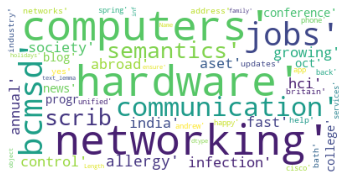

In [ ]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

## Visualize top N uni-grams, bi-grams & tri-grams

[Text(0, 0, 'software'),
 Text(0, 0, 'work'),
 Text(0, 0, 'development'),
 Text(0, 0, 'home'),
 Text(0, 0, 'remote'),
 Text(0, 0, 'disaster'),
 Text(0, 0, 'working'),
 Text(0, 0, 'resilience'),
 Text(0, 0, 'recovery'),
 Text(0, 0, 'security'),
 Text(0, 0, 'business'),
 Text(0, 0, 'jobs'),
 Text(0, 0, 'new'),
 Text(0, 0, 'data'),
 Text(0, 0, 'digital'),
 Text(0, 0, 'engineers'),
 Text(0, 0, 'cloud'),
 Text(0, 0, 'engineer'),
 Text(0, 0, 'agile'),
 Text(0, 0, 'management')]

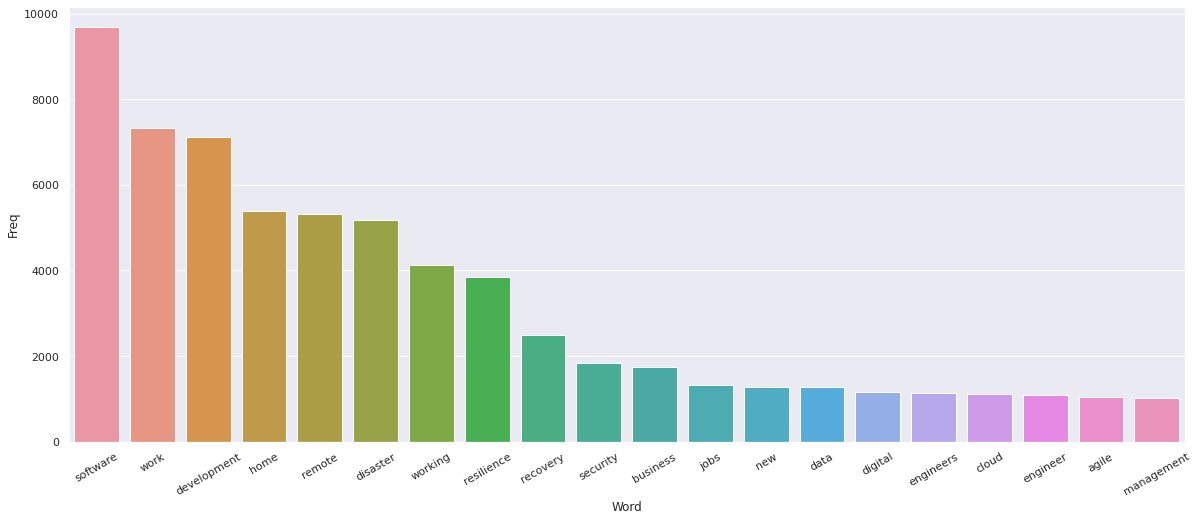

In [ ]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(20,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                 Bi-gram  Freq
0   software development  6676
1              work home  5019
2         remote working  3689
3      disaster recovery  2322
4     software engineers  1041
5         agile software   671
6    business continuity   478
7              home work   463
8      software software   428
9              work work   424
10           remote work   368
11   disaster management   359
12  development software   332
13       disaster relief   321
14     software engineer   293
15              days ago   288
16        employees work   281
17      cyber resilience   279
18      aastha bhatnagar   276
19      juniper networks   270


[Text(0, 0, 'software development'),
 Text(0, 0, 'work home'),
 Text(0, 0, 'remote working'),
 Text(0, 0, 'disaster recovery'),
 Text(0, 0, 'software engineers'),
 Text(0, 0, 'agile software'),
 Text(0, 0, 'business continuity'),
 Text(0, 0, 'home work'),
 Text(0, 0, 'software software'),
 Text(0, 0, 'work work'),
 Text(0, 0, 'remote work'),
 Text(0, 0, 'disaster management'),
 Text(0, 0, 'development software'),
 Text(0, 0, 'disaster relief'),
 Text(0, 0, 'software engineer'),
 Text(0, 0, 'days ago'),
 Text(0, 0, 'employees work'),
 Text(0, 0, 'cyber resilience'),
 Text(0, 0, 'aastha bhatnagar'),
 Text(0, 0, 'juniper networks')]

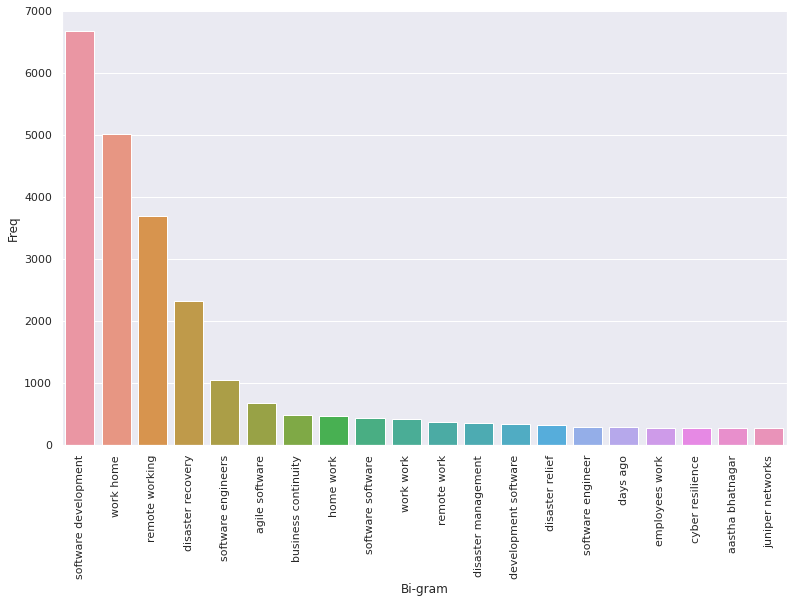

In [ ]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=90)

                         Tri-gram  Freq
0      agile software development   638
1                  work home work   442
2   software software development   424
3   software development software   301
4             employees work home   266
5              anywhere work home   261
6              work anywhere work   257
7     software development course   251
8    vocational teachers vodafone   249
9        teachers vodafone latest   249
10       vodafone latest vodafone   249
11           latest vodafone work   249
12             vodafone work home   249
13    directorate purchase stores   247
14         purchase stores dpsdae   247
15         stores dpsdae disaster   247
16     dpsdae disaster management   247
17  software development engineer   239
18            pagerduty born idea   222
19             born idea software   220


[Text(0, 0, 'agile software development'),
 Text(0, 0, 'work home work'),
 Text(0, 0, 'software software development'),
 Text(0, 0, 'software development software'),
 Text(0, 0, 'employees work home'),
 Text(0, 0, 'anywhere work home'),
 Text(0, 0, 'work anywhere work'),
 Text(0, 0, 'software development course'),
 Text(0, 0, 'vocational teachers vodafone'),
 Text(0, 0, 'teachers vodafone latest'),
 Text(0, 0, 'vodafone latest vodafone'),
 Text(0, 0, 'latest vodafone work'),
 Text(0, 0, 'vodafone work home'),
 Text(0, 0, 'directorate purchase stores'),
 Text(0, 0, 'purchase stores dpsdae'),
 Text(0, 0, 'stores dpsdae disaster'),
 Text(0, 0, 'dpsdae disaster management'),
 Text(0, 0, 'software development engineer'),
 Text(0, 0, 'pagerduty born idea'),
 Text(0, 0, 'born idea software')]

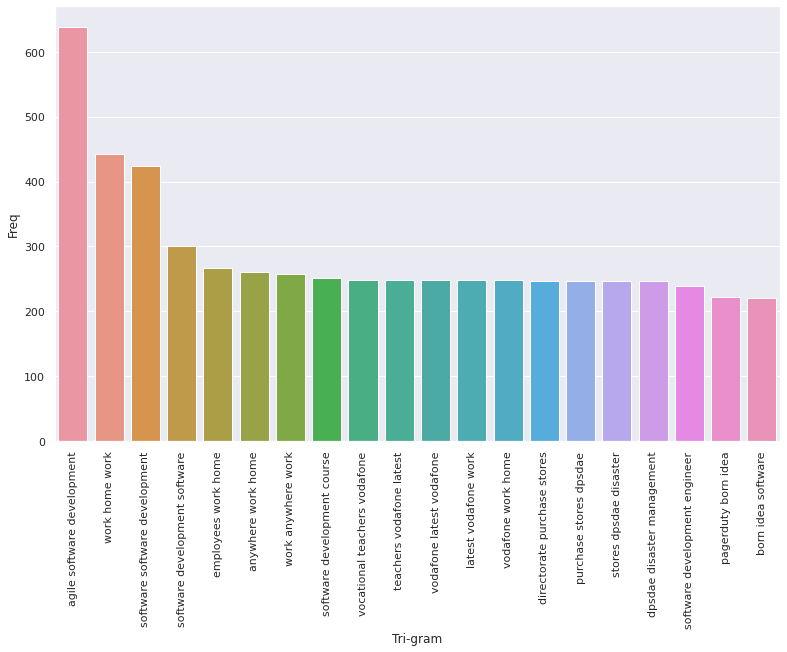

In [ ]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=5000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=90)

## Analisar a ocorrência de palavras chaves

In [ ]:
#https://medium.com/better-programming/how-i-analyzed-mediums-popular-page-with-python-part-2-c1952583061e

# strings or keywords to look for
#keywords = [
#"covid impact",
#"disaster",
#"resilience",
#"software",
#"software development",
#"crisis informatics",
#"productivity",
#"work from home",
#"remote working"]

keywords  = [
"coronavirus",
"covid-19",
"covid",
"coronavirus impact",
"covid-19 impact",
"covid impact",
"disaster",
"resilience", 
"software",
"software engineers",
"software engineering",
"software development",
"engineering",
"it industry",
"information technology industry",
"information technology it industry",
"crisis informatics",
"disaster informatics",
"productivity",
"work from home",
"remote working",
"future of work"
]

In [ ]:
# search rows for keywords and show True if there is a match
for keyword in keywords:
    df[keyword] = df.astype(str).sum(axis=1).str.contains(keyword, case=False)

In [ ]:
df['Keyword Match'] = df.astype(str).sum(axis=1).str.contains('True', case=False)
df

,date,header,summary,link,protocol,domain,path,query,fragment,host_name,ip_address,CountryCode,CountryName,State,City,Longitude,Latitude,Asn,edges,Type,AdditionalData,IpAddress,header_context_true,summary_context_true,year,month,quarter,day,day_of_week,text_context_true,text_wo_punct,text_clean,text_wo_stopfreq,text_wo_stopfreqrare,text_lemma,word_count,char_count,avg_word,stopwords,hastags,for_spacy,spacy_monologue,lemmatized,coronavirus,covid-19,covid,coronavirus impact,covid-19 impact,covid impact,disaster,resilience,software,software engineers,software engineering,software development,engineering,it industry,information technology industry,information technology it industry,crisis informatics,disaster informatics,productivity,work from home,remote working,future of work,Keyword Match
9,2019-10-01,It Computers Hardware Networking Jobs in Kuala...,Python Engineer<br> <br> Responsibilities:<br>...,https://www.monster.com.my/search/it-computers...,https,www.monster.com.my,/search/it-computers-hardware-networking-jobs-...,NaN,NaN,monster.com.my,23.59.127.247,US,United States,Georgia,Atlanta,-84.388283,33.798458,16625.0,set(),geolocation,{},23.59.127.247,it computers hardware networking jobs in kuala...,python engineer<br> <br> responsibilities:<br>...,2019,10,4,1,1,it computers hardware networking jobs in kuala...,it computers hardware networking jobs in kuala...,"[computers, hardware, networking, jobs, kuala,...","['computers', 'hardware', 'networking', 'jobs'...","['computers', 'hardware', 'networking', 'jobs'...","['computers', 'hardware', 'networking', 'jobs'...",19,292,0.938356,9,0,it computers hardware networking jobs in kuala...,"(it, computers, hardware, networking, jobs, in...",it computer hardware networking job in kuala l...,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True
1,2019-10-01,bcmsd | Communication | Semantics - Scribd,"Oct 1, 2019 — ... can be broadly divided into ...",https://www.scribd.com/document/428306594/bcmsd,https,www.scribd.com,/document/428306594/bcmsd,NaN,NaN,scribd.com,151.101.2.152,US,United States,California,San Francisco,-122.392860,37.767849,54113.0,set(),geolocation,{},151.101.2.152,bcmsd | communication | semantics - scribd,"oct 1, 2019 — ... can be broadly divided into ...",2019,10,4,1,1,bcmsd | communication | semantics - scribd oct...,bcmsd communication semantics scribd oct 1 ...,"[bcmsd, communication, semantics, scribd, oct,...","['bcmsd', 'communication', 'semantics', 'scrib...","['bcmsd', 'communication', 'semantics', 'scrib...","['bcmsd', 'communication', 'semantics', 'scrib...",19,207,0.913043,6,0,bcmsd communication semantics scribd oct — ca...,"(bcmsd, communication, semantics, scribd, oct,...",bcmsd communication semantic scribd oct — ca...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,2019-10-01,Allergy – Infection Control Society Pakistan,"Oct 1, 2019 — Great on paper-unfortunately a d...",https://infectioncontrolsociety.com/4190-2/,https,infectioncontrolsociety.com,/4190-2/,NaN,NaN,infectioncontrolsociety.com,192.254.187.12,US,United States,Massachusetts,Burlington,-71.204536,42.505989,46606.0,set(),geolocation,{},192.254.187.12,allergy – infection control society pakistan,"oct 1, 2019 — great on paper-unfortunately a d...",2019,10,4,1,1,allergy – infection control society pakistan o...,allergy – infection control society pakistan o...,"[allergy, infection, control, society, pakista...","['allergy', 'infection', 'control', 'society',...","['allergy', 'infection', 'control', 'society',...","['allergy', 'infection', 'control', 'society',...",21,225,0.911111,4,0,allergy – infection control society pakistan o...,"(allergy, –, infection, control, society, paki...",allergy – infection control society pakistan o...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,Fal

In [ ]:
# add to existing keywords list for the total count column created
keywords.append('Keyword Match')
# define count of keywords df and get count of each column
count_of_keywords = df[keywords]
count_of_keywords = count_of_keywords.apply(pd.Series.value_counts)
count_of_keywords

,coronavirus,covid-19,covid,coronavirus impact,covid-19 impact,covid impact,disaster,resilience,software,software engineers,software engineering,software development,engineering,it industry,information technology industry,information technology it industry,crisis informatics,disaster informatics,productivity,work from home,remote working,future of work,Keyword Match
False,10757,10174,9894,11072,11067,11006,6266,7270,3503,10032,11036,4499,10802,11059,11075,11076.0,11076.0,11056,10686,6096,7486,11056,349
True,319,902,1182,4,9,70,4810,3806,7573,1044,40,6577,274,17,1,NaN,NaN,20,390,4980,3590,20,10727


## Top Topics

In [ ]:
# Lista de stop words
from sklearn.feature_extraction import text
lista_stop_words = (text
                    .ENGLISH_STOP_WORDS
                    .union(['nov','dez','jan','fev', 'mar']))

In [ ]:
# Configurando max_df para 0,5 e min_df = 2, porque estes forneceram os melhores tópicos
cv1 = CountVectorizer(stop_words = lista_stop_words, max_df = 0.5, min_df = 2)

In [ ]:
# Cria a matriz de documentos, que basicamente contém palavras em representações numéricas
docterm_matrix = cv1.fit_transform(df.loc[:, 'lemmatized'])

In [ ]:
# Labels
doc_label = ['Document' + str(t) for t in range(len(df.loc[:, 'lemmatized']))]

In [ ]:
# Matriz pronta
pd.DataFrame(docterm_matrix.toarray(), index = doc_label, columns = cv1.get_feature_names())

,aa,aadhaar,aadhar,aaron,aastha,ab,ababa,abandon,abb,abbott,abdul,abdullahi,abeygunawardane,ability,able,abrams,abreast,abroad,abrupt,absence,absent,absenteeism,absolute,absolutely,absorb,abstract,abundance,abuse,abuzeid,ac,academia,academic,academy,acca,accelerate,accelerated,acceleration,accelerator,accenture,accept,...,yumpu,yzmir,zack,zanna,zdnet,zealand,zero,zeroday,zerotrust,zerto,zfs,zhengfei,zila,zim,zinatullin,zip,zippia,zoek,zoho,zone,zoom,zoomtopia,zos,zscaler,zuckerberg,материалы,по,теме,اليوم,بتاريخ,تجميعة,تخصصات,في,مصر,وظائف,अब,आय,ทธ,ประส,าน
Document0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Document1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Document2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Document3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Document4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Document11071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Document11072,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Document11073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Document11074,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Usaremos Non-Negative Matrix Factorization (NMF) para preencher a matriz com os tópicos por documento.

O código abaixo usa o NMF para 12 tópicos, mas tentamos vários hiperparâmetros diferentes (incluindo a configuração de max_df e min_df no count_vectorizer) antes de escolher o 12, que fornecia os tópicos mais claros e distintos.

In [ ]:
# Cria e treina o modelo
nmf_cv = NMF(10)
nmf_topics1 = nmf_cv.fit_transform(docterm_matrix)

In [ ]:
# Dataframe de tópicos
topicword_cv1 = pd.DataFrame(nmf_cv.components_.round(3),
                            index = ['topic0', 'topic1', 'topic2', 'topic3', 'topic4',
                                     'topic5', 'topic6', 'topic7', 'topic8', 'topic9'],
                            columns = cv1.get_feature_names()) 

In [ ]:
topicword_cv1

,aa,aadhaar,aadhar,aaron,aastha,ab,ababa,abandon,abb,abbott,abdul,abdullahi,abeygunawardane,ability,able,abrams,abreast,abroad,abrupt,absence,absent,absenteeism,absolute,absolutely,absorb,abstract,abundance,abuse,abuzeid,ac,academia,academic,academy,acca,accelerate,accelerated,acceleration,accelerator,accenture,accept,...,yumpu,yzmir,zack,zanna,zdnet,zealand,zero,zeroday,zerotrust,zerto,zfs,zhengfei,zila,zim,zinatullin,zip,zippia,zoek,zoho,zone,zoom,zoomtopia,zos,zscaler,zuckerberg,материалы,по,теме,اليوم,بتاريخ,تجميعة,تخصصات,في,مصر,وظائف,अब,आय,ทธ,ประส,าน
topic0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.056,0.000,0.000,0.000,0.016,0.000,0.000,0.000,0.000,0.019,0.001,0.000,0.006,0.011,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
topic1,0.001,0.000,0.0,0.000,0.000,0.000,0.001,0.003,0.000,0.001,0.003,0.000,0.000,0.161,0.239,0.003,0.000,0.007,0.000,0.002,0.000,0.003,0.007,0.000,0.000,0.004,0.002,0.004,0.001,0.003,0.000,0.009,0.008,0.000,0.015,0.000,0.000,0.000,0.001,0.003,...,0.000,0.000,0.001,0.009,0.001,0.000,0.006,0.000,0.003,0.000,0.000,0.003,0.004,0.000,0.000,0.001,0.000,0.000,0.003,0.039,0.000,0.007,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.003,0.003,0.003,0.005,0.003,0.003,0.000,0.000,0.006,0.002,0.002
topic2,0.000,0.000,0.0,0.000,0.000,0.002,0.002,0.000,0.001,0.003,0.000,0.000,0.000,0.000,0.024,0.001,0.000,0.003,0.000,0.005,0.000,0.000,0.004,0.001,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.004,0.000,0.006,0.000,0.000,...,0.000,0.001,0.001,0.002,0.000,0.000,0.000,0.000,0.000,0.026,0.002,0.019,0.000,0.001,0.000,0.000,0.027,0.002,0.003,0.002,0.029,0.000,0.006,0.002,0.000,0.000,0.000,0.000,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.000,0.000,0.000,0.000,0.000
topic3,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.005,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.001,0.000,0.005,0.002,0.000,0.000,0.000,0.002,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.004,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.006,0.000,0.003,0.003,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
topic4,0.000,0.000,0.0,0.000,0.000,0.000,0.006,0.000,0.000,0.000,0.001,0.000,0.000,0.043,0.000,0.000,0.003,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.001,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.007,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.013,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000
topic5,0.009,0.018,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.009,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.008,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.001,0.018,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.016,0.018,0.000,0.000,0.000
topic6,0.000,0.000,0.0,0.000,3.009,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.009,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.008,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.002,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000
topic7,0.000,0.

Criamos um dataframe com os 10 tópicos nas linhas e os termos nas colunas. Os valores no dataframe descrevem como o termo se relaciona com o tópico, com valores mais altos indicando um relacionamento mais forte.

In [ ]:
# Função para encontrar as palavras mais importantes por tópico
def top_words_per_topic(model, terms, topic_names = None):
    for ix, topic in enumerate(nmf_cv.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTópico ", ix)
        else:
            print("\nTópico '",topic_names[ix],"'")
        print(", ".join([cv1.get_feature_names()[i] for i in topic.argsort()[:-10 - 1:-1]]))

In [ ]:
top_words_per_topic(nmf_topics1,topicword_cv1)


Tópico  0
remote, disaster, disability, agile, relief, worker, home, iq, aggregate, medium

Tópico  1
home, employee, resilience, company, microsoft, people, office, need, oct, time

Tópico  2
disaster, recovery, business, service, continuity, backup, digital, plan, support, solution

Tópico  3
application, resilience, security, life, remove, non, balance, rental, remoteworke, protection

Tópico  4
job, experience, manager, developer, apply, remote, year, employment, role, near

Tópico  5
vodafone, management, disaster, late, teacher, course, store, vocational, purchase, directorate

Tópico  6
remote, aastha, automate, agile, bhatnagar, year, agility, trend, workforce, remotely

Tópico  7
security, network, new, cloud, solution, resilience, cyber, launch, enhance, idea

Tópico  8
remote, working, resilience, digital, business, research, new, technology, company, team

Tópico  9
engineer, senior, team, ago, devop, day, architect, test, experience, developer


In [ ]:
#topics = ['work', 'remote', 'home', 'disaster', 'agile', 'resilience', 'management', 'worker', 'working', 'business', 'recovery', 'working']

In [ ]:
#keywords = [
#"coronavirus",    
#"covid impact",
#"disaster",
#"resilience",
#"software engineers",
#"software development",
#"disaster informatics",
#"productivity",
#"work from home",
#"remote working"]

In [ ]:
# Buscamos os speakers
df_docs_topics = df.loc[:, ['host_name']]

In [ ]:
# Visualiza
df_docs_topics

,host_name
9,monster.com.my
1,scribd.com
2,infectioncontrolsociety.com
4,ciol.com
6,asetonline.org
...,...
2,bathcollege.ac.uk
3,sap.com
4,dailymail.co.uk
20,cisco.com


In [ ]:
# Buscamos os tópicos mais relevantes
df_docs_topics['topics1'] = nmf_topics1.argmax(axis = 1) 
df_docs_topics

,host_name,topics1
9,monster.com.my,9
1,scribd.com,2
2,infectioncontrolsociety.com,1
4,ciol.com,2
6,asetonline.org,8
...,...,...
2,bathcollege.ac.uk,2
3,sap.com,2
4,dailymail.co.uk,9
20,cisco.com,3


In [ ]:
df_docs_topics[df_docs_topics['host_name'] == 'microsoft.com']

,host_name,topics1
22,microsoft.com,2
19,microsoft.com,2
13,microsoft.com,2
30,microsoft.com,4
0,microsoft.com,1
0,microsoft.com,1
28,microsoft.com,1
73,microsoft.com,8
60,microsoft.com,1
52,microsoft.com,7


In [ ]:
# Tópicos por empresa
speaker_topics = pd.DataFrame(df_docs_topics.groupby(['topics1']).host_name.value_counts())
speaker_topics.columns = ['count']
speaker_topics.reset_index()
speaker_topics_pivot = speaker_topics.reset_index().pivot_table(index = 'topics1', columns = 'host_name', values = 'count', fill_value = 0).reset_index(drop = True)
speaker_topics_pivot['total'] = df_docs_topics['topics1'].sum()
speaker_topics_pivot.sort_values('total', inplace = True)

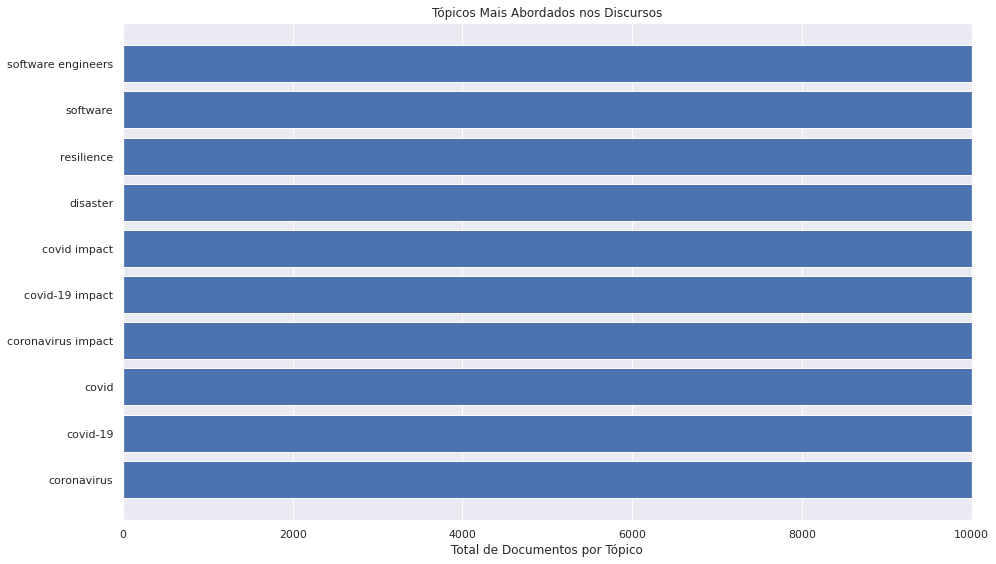

In [ ]:
# Plot
plt.figure(figsize = (14, 8))
names = list(set(speaker_topics_pivot.index))
plt.title('Tópicos Mais Abordados nos Discursos')
plt.xlabel('Total de Documentos por Tópico')
plt.xlim(0, 10000)
plt.barh(names, speaker_topics_pivot['total'], edgecolor = 'white')

'''
plt.yticks(range(0, 10), ['work', 'remote', 'home', 'disaster', 'agile',
                          'relief', 'disability', 'worker', 'career', 'visa'])
'''
plt.yticks(range(0, 10), keywords)


plt.tight_layout()

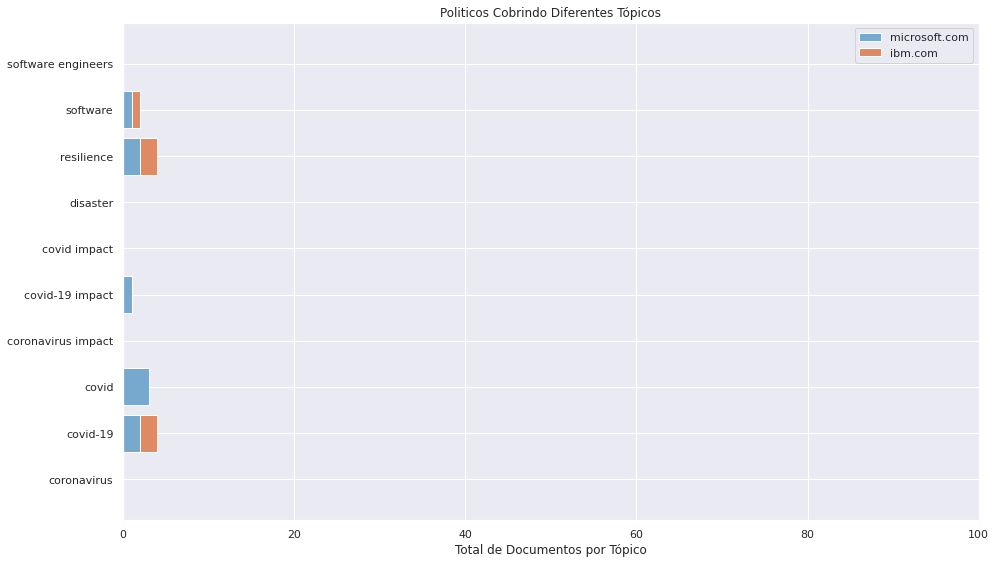

In [ ]:
# Plot
plt.figure(figsize = (14, 8))
names = list(set(speaker_topics_pivot.index))
plt.title('Politicos Cobrindo Diferentes Tópicos')
plt.xlabel('Total de Documentos por Tópico')
plt.xlim(0, 100)
plt.barh(names, speaker_topics_pivot['microsoft.com'], color = '#77a9cf', edgecolor = 'white', label = 'microsoft.com')
plt.barh(names, speaker_topics_pivot['ibm.com'], left = speaker_topics_pivot['ibm.com'], color = '#df8a62', edgecolor = 'white', label = 'ibm.com')
plt.yticks(range(0, 10), keywords)
plt.legend()
plt.tight_layout()